In [180]:
#divide data into two groups (first 50 like films more than shows becuase they give better score to films)
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
 

# Data Generation Code

#group 1: film lovers
persons = ['person' + str(i) for i in range(1,1001)]
 
film = ['film' + str(i) for i in range(1,11)]
show = ['show' + str(i) for i in range(1,11)]
 
df1 = pd.DataFrame(columns=[*film, *show], index=persons)
  
for person in df1.index:
    df1.loc[person,'show1':'show10'] = np.random.randint(low=1, high=3, size=10)
    df1.loc[person,'film1':'film10'] = np.random.randint(low=3, high=6, size=10)
    
#print(df1.head())
#print(df1.shape)

In [181]:
np.round(df1.describe(), decimals=2)

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.0
mean,4.05,4.01,3.99,4.06,3.97,3.99,3.94,4.01,4.01,4.01,1.5,1.52,1.52,1.47,1.48,1.47,1.5,1.49,1.49,1.5
std,0.82,0.83,0.83,0.81,0.80,0.80,0.82,0.82,0.82,0.80,0.5,0.50,0.50,0.50,0.50,0.50,0.5,0.50,0.50,0.5
min,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0
25%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0
50%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.0,2.00,2.00,1.00,1.00,1.00,2.0,1.00,1.00,1.0
75%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00,2.0
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00,2.0


In [182]:
#data[["film1"]].plot.hist()
#data[["show1"]].plot.hist()
#data[["show1"]].plot.hist()
#data[["show1", "film1"]].plot.hist()


In [183]:
# Data Generation Code

#group 2: show lovers
persons = ['person' + str(i) for i in range(1,1001)]
 
film = ['film' + str(i) for i in range(1,11)]
show = ['show' + str(i) for i in range(1,11)]
 
df2 = pd.DataFrame(columns=[*film, *show], index=persons)
  
for person in df2.index:
    df2.loc[person,'show1':'show10'] = np.random.randint(low=3, high=6, size=10)
    df2.loc[person,'film1':'film10'] = np.random.randint(low=1, high=3, size=10)
    
#print(df2.head())
#print(df2.shape)

In [184]:
np.round(df2.describe(), decimals=2)

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
count,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00
mean,1.54,1.5,1.46,1.49,1.52,1.49,1.49,1.5,1.49,1.49,4.04,4.00,4.04,3.95,3.94,3.98,3.96,4.0,4.01,3.98
std,0.50,0.5,0.50,0.50,0.50,0.50,0.50,0.5,0.50,0.50,0.82,0.83,0.81,0.82,0.80,0.82,0.81,0.8,0.82,0.82
min,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00
25%,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00
50%,2.00,1.0,1.00,1.00,2.00,1.00,1.00,1.0,1.00,1.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00
75%,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00
max,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00


In [185]:
#group 3: loves both movies and shows, but more biased toward movies 
persons = ['person' + str(i) for i in range(1,1001)]
 
film = ['film' + str(i) for i in range(1,11)]
show = ['show' + str(i) for i in range(1,11)]
 
df3 = pd.DataFrame(columns=[*film, *show], index=persons)
  
for person in df2.index:
    df3.loc[person,'show1':'show10'] = np.random.randint(low=1, high=6, size=10)
    df3.loc[person,'film1':'film10'] = np.random.randint(low=3, high=6, size=10)
    
#print(df3.head())
#print(df3.shape)

In [186]:
np.round(df3.describe(), decimals=2)

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,4.04,4.03,4.01,4.01,4.00,3.99,4.03,3.98,4.00,4.06,2.90,2.98,2.94,3.04,2.95,3.03,3.01,3.01,3.04,2.98
std,0.82,0.82,0.81,0.83,0.81,0.82,0.81,0.81,0.83,0.81,1.38,1.45,1.44,1.41,1.41,1.44,1.42,1.42,1.39,1.43
min,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [187]:
#group 4: loves both movies and shows, but more biased toward shows! 
persons = ['person' + str(i) for i in range(1,1001)]
 
film = ['film' + str(i) for i in range(1,11)]
show = ['show' + str(i) for i in range(1,11)]
 
df4 = pd.DataFrame(columns=[*film, *show], index=persons)
  
for person in df2.index:
    df4.loc[person,'show1':'show10'] = np.random.randint(low=3, high=6, size=10)
    df4.loc[person,'film1':'film10'] = np.random.randint(low=1, high=6, size=10)
    
#print(df4.head())
#print(df4.shape)

In [188]:
np.round(df4.describe(), decimals=2)

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0
mean,2.99,2.95,3.08,2.94,3.01,2.98,3.01,2.99,3.00,3.02,3.99,4.03,4.06,4.03,4.00,4.04,3.99,4.01,4.00,4.0
std,1.40,1.43,1.40,1.37,1.42,1.43,1.45,1.44,1.39,1.41,0.82,0.81,0.83,0.82,0.82,0.81,0.82,0.80,0.82,0.8
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0
50%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0


In [209]:
#method1:
data=pd.DataFrame(df1.append(df2).append(df3).append(df4))
#method2:
#data=pd.concat([df1,df2,df3,df4],keys=['person'])
#shuffle dataste!!
data = data.sample(frac=1).reset_index(drop=True)

In [210]:
#data.describe()
np.round(data.describe(), decimals=2)


,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,3.15,3.12,3.14,3.13,3.13,3.11,3.12,3.12,3.12,3.14,3.11,3.13,3.14,3.12,3.09,3.13,3.11,3.13,3.13,3.11
std,1.39,1.41,1.40,1.40,1.38,1.40,1.40,1.40,1.39,1.40,1.39,1.40,1.41,1.40,1.39,1.41,1.38,1.39,1.39,1.39
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [211]:
# center and scale the data
scaled_data = preprocessing.scale(data)
norm_data = pd.DataFrame(scaled_data)
#scaled_data.tail() 
train_data = norm_data.iloc[0:80,:]
test_data = norm_data.iloc[80:,:]

In [212]:
train_data.T.shape

(20, 80)

In [213]:
#data.shape
data.tail()

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
3995,5,4,5,3,5,5,3,1,2,4,3,5,4,3,3,5,4,4,3,5
3996,5,4,4,4,4,4,3,3,5,3,3,2,1,3,4,5,3,3,5,3
3997,1,2,1,1,2,1,1,1,2,1,5,3,5,3,3,5,5,3,3,4
3998,3,4,5,4,5,5,4,3,3,5,4,2,4,2,2,4,2,1,1,5
3999,2,2,2,2,2,1,1,1,2,2,3,4,5,3,4,5,3,5,4,5


In [214]:
pca =  PCA(n_components=2).fit(train_data)
P = pca.transform(train_data)

In [215]:
pca.components_[1]

array([0.20685191, 0.18665904, 0.26465885, 0.20330639, 0.22205818,
       0.2604279 , 0.20521618, 0.19881546, 0.18507934, 0.28998584,
       0.30524144, 0.14890911, 0.19450405, 0.25914439, 0.31894521,
       0.14420726, 0.25768891, 0.22944579, 0.13592317, 0.11616036])

In [216]:
P.shape

(80, 2)

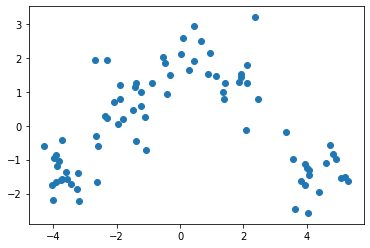

In [217]:
plt.scatter(P[:,0],P[:,1])

In [218]:
Ptest = pca.transform(test_data)
Ptest.shape

(3920, 2)

In [219]:
from sklearn.neighbors import NearestNeighbors
K = NearestNeighbors(n_neighbors=3)
nn = K.fit(P)

In [220]:
D, N = nn.kneighbors(Ptest)

In [221]:
D

array([[0.17773608, 0.17815297, 0.20206918],
       [0.20902948, 0.60407451, 0.65133136],
       [0.19257048, 0.23827238, 0.82527644],
       ...,
       [0.05074118, 0.52198703, 0.63746248],
       [0.1179737 , 0.23346839, 0.43139106],
       [0.17291881, 0.25622485, 0.26319974]])

In [222]:
N

array([[36, 28,  8],
       [ 1, 66, 59],
       [58, 46, 59],
       ...,
       [ 1, 59, 27],
       [76, 15,  9],
       [52, 27, 49]])

In [223]:
np.sqrt(np.sum(np.square(test_data.iloc[0,:]-train_data.iloc[48,:])))

8.543808627274192

In [224]:
train_data.iloc[0,:]

0     1.324674
1     0.623370
2    -0.096434
3     1.335741
4     0.631996
5     0.634219
6     0.630599
7     0.629020
8     1.347684
9     1.323769
10   -0.794545
11    1.333651
12   -0.097753
13    1.340515
14    0.651061
15    1.321398
16    1.362166
17   -0.808718
18    0.622323
19    0.635279
Name: 0, dtype: float64

In [225]:
test_data.iloc[0,:]

0    -0.828392
1    -0.796203
2    -1.525088
3    -0.804870
4    -1.539191
5    -0.798235
6    -1.513689
7    -1.516586
8    -1.525076
9    -0.815944
10    1.356265
11   -0.094050
12   -0.097753
13    0.626241
14    1.370268
15    0.614295
16    0.639915
17    1.343081
18    1.340526
19    0.635279
Name: 80, dtype: float64

In [226]:
np.sqrt(np.sum(np.square(Ptest[0,:]-P[48,:])))

8.014934442912532

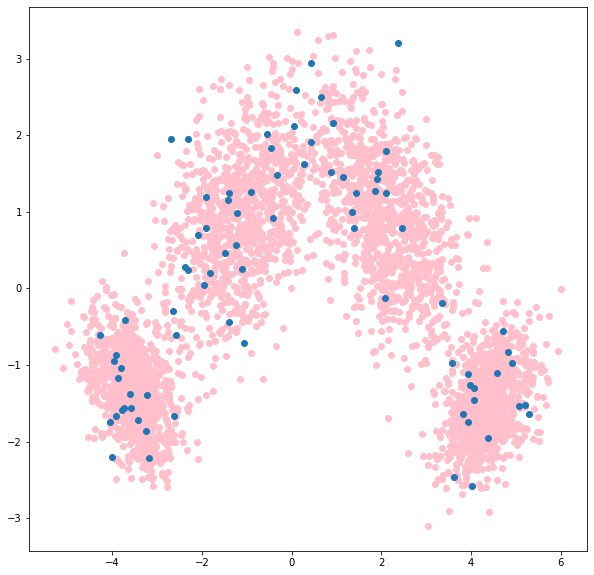

In [227]:
plt.figure(figsize=(10,10))
plt.scatter(Ptest[:,0],Ptest[:,1],color='pink')
plt.scatter(P[:,0],P[:,1])

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3)
#nn = knn.fit(P)
#pred = nn.predict(Ptest)

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(P)
distances, indices = nbrs.kneighbors(P)
indices
#Ptest[0,:], P[70,:], P[24,:]

array([[ 0, 12],
       [ 1, 59],
       [ 2, 19],
       [ 3, 16],
       [ 4, 37],
       [ 5, 67],
       [ 6, 31],
       [ 7, 14],
       [ 8, 36],
       [ 9, 55],
       [10, 22],
       [11, 55],
       [12, 18],
       [13, 39],
       [14, 20],
       [15, 76],
       [16,  3],
       [17, 48],
       [18, 21],
       [19, 25],
       [20, 49],
       [21, 18],
       [22, 69],
       [23, 44],
       [24,  0],
       [25, 19],
       [26, 45],
       [27, 52],
       [28, 36],
       [29, 22],
       [30, 47],
       [31,  6],
       [32, 54],
       [33, 38],
       [34, 54],
       [35, 72],
       [36,  8],
       [37,  4],
       [38, 33],
       [39, 13],
       [40, 31],
       [41, 23],
       [42, 64],
       [43, 72],
       [44, 23],
       [45, 79],
       [46, 58],
       [47, 30],
       [48, 42],
       [49, 52],
       [50,  8],
       [51, 40],
       [52, 49],
       [53, 57],
       [54, 32],
       [55,  9],
       [56, 74],
       [57, 66],
       [58, 46

In [229]:
nbrs.kneighbors_graph(Ptest).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
from sklearn.neighbors import KDTree
kdt = KDTree(P, leaf_size=30, metric='euclidean')
kdt.query(Ptest, k=3, return_distance=False)

array([[36, 28,  8],
       [ 1, 66, 59],
       [58, 46, 59],
       ...,
       [ 1, 59, 27],
       [76, 15,  9],
       [52, 27, 49]])

In [231]:
nbrs_auto = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(P)
distances, indices = nbrs_auto.kneighbors(P)

#indices


In [232]:
nbrs_brute = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(P)
distances, indices = nbrs_brute.kneighbors(P)

In [233]:
#indices

In [234]:
from sklearn.neighbors import KernelDensity
import numpy as np
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(P)
kde.score_samples(P)

#other kernel: tophat, epanechnikov, linear, exponential, cosine

array([-2.88252199, -2.92954203, -2.64870257, -2.74717317, -2.27844188,
       -2.62344266, -2.51139947, -3.00077876, -2.19420242, -2.49432604,
       -2.83698952, -2.72667862, -2.81169251, -1.51111637, -2.80578128,
       -2.46663283, -2.75807624, -2.79514944, -2.66196508, -1.93150037,
       -2.0268656 , -2.72667856, -1.900064  , -2.15506831, -2.91105913,
       -1.84797935, -2.98562483, -1.87237627, -2.6179533 , -2.92410551,
       -2.83777693, -2.42001441, -2.5100696 , -2.85918802, -2.37634945,
       -2.32054309, -2.28192677, -2.23554644, -2.89778571, -1.53391482,
       -2.80424793, -2.89324096, -1.93883871, -2.18146937, -1.76118535,
       -2.23406622, -2.89461946, -2.83769294, -2.3860793 , -1.77170023,
       -2.66138927, -2.96861434, -1.79995761, -2.21732274, -2.28207239,
       -2.43807063, -2.90741766, -2.07442319, -2.89564551, -2.21979324,
       -3.00102788, -2.99057043, -2.42299953, -1.87262119, -1.5812573 ,
       -3.00102198, -2.20408209, -2.48295763, -2.77428082, -1.85

In [235]:
data.iloc[36,:]

film1     2
film2     2
film3     1
film4     1
film5     1
film6     2
film7     2
film8     2
film9     1
film10    2
show1     3
show2     5
show3     3
show4     5
show5     5
show6     5
show7     4
show8     4
show9     5
show10    4
Name: 36, dtype: int64

In [236]:
data.iloc[9,:]

film1     3
film2     3
film3     4
film4     4
film5     5
film6     5
film7     3
film8     4
film9     3
film10    5
show1     1
show2     4
show3     2
show4     4
show5     1
show6     1
show7     5
show8     4
show9     3
show10    2
Name: 9, dtype: int64

In [237]:
data.head()

,film1,film2,film3,film4,film5,film6,film7,film8,film9,film10,show1,show2,show3,show4,show5,show6,show7,show8,show9,show10
0,5,4,3,5,4,4,4,4,5,5,2,5,3,5,4,5,5,2,4,4
1,2,1,1,1,1,2,1,1,2,2,4,5,3,4,3,5,4,3,3,5
2,3,5,2,2,4,4,2,4,3,3,5,4,4,5,5,3,5,4,4,3
3,4,5,3,5,3,3,4,5,5,4,1,1,5,5,1,2,2,1,1,3
4,5,3,5,5,3,3,3,5,5,5,3,1,2,2,2,1,3,1,5,4


In [238]:
data.iloc[80,:]

film1     2
film2     2
film3     1
film4     2
film5     1
film6     2
film7     1
film8     1
film9     1
film10    2
show1     5
show2     3
show3     3
show4     4
show5     5
show6     4
show7     4
show8     5
show9     5
show10    4
Name: 80, dtype: int64

In [239]:
data.iloc[6,:]

film1     4
film2     4
film3     4
film4     3
film5     5
film6     4
film7     3
film8     5
film9     5
film10    4
show1     4
show2     5
show3     4
show4     5
show5     5
show6     1
show7     2
show8     3
show9     2
show10    3
Name: 6, dtype: int64

In [240]:
# 4 groups : 100 different movies : user prefrences varies in the groups 
# get the logic ; how do you make the reccomendation

In [242]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(P)
NearestNeighbors(n_neighbors=1)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [245]:
P.shape

(80, 2)

In [250]:
print(neigh.kneighbors([[5,5]]))


(array([[3.18548196]]), array([[60]]))


this means that the element is at distance 0.35 and is the 55 element of samples (indexes start at 0).

In [251]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(data)
NearestNeighbors(n_neighbors=1)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [253]:
print(neigh.kneighbors([[5,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,1,1,1,1]]))


(array([[2.]]), array([[692]]))


In [254]:
data.iloc[692,:]

film1     5
film2     5
film3     5
film4     4
film5     4
film6     5
film7     5
film8     5
film9     5
film10    4
show1     1
show2     1
show3     1
show4     2
show5     1
show6     1
show7     1
show8     1
show9     1
show10    1
Name: 692, dtype: int64

In [257]:
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(data)
NearestNeighbors(n_neighbors=3)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [260]:
print(neigh.kneighbors([[5,5,4,4,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1]]))

(array([[2.44948974, 2.44948974, 2.64575131]]), array([[3559,   41, 3104]]))


In [261]:
data.iloc[3559,:]

film1     5
film2     4
film3     4
film4     4
film5     3
film6     3
film7     4
film8     3
film9     3
film10    3
show1     1
show2     2
show3     1
show4     2
show5     1
show6     1
show7     1
show8     2
show9     2
show10    1
Name: 3559, dtype: int64

In [262]:
data.iloc[41,:]

film1     5
film2     5
film3     4
film4     4
film5     5
film6     3
film7     3
film8     3
film9     4
film10    3
show1     1
show2     1
show3     1
show4     1
show5     1
show6     1
show7     1
show8     1
show9     2
show10    1
Name: 41, dtype: int64

In [263]:
data.iloc[3104,:]

film1     5
film2     4
film3     4
film4     5
film5     3
film6     3
film7     4
film8     3
film9     4
film10    4
show1     1
show2     2
show3     1
show4     1
show5     2
show6     1
show7     1
show8     1
show9     1
show10    1
Name: 3104, dtype: int64

If a person watched film1,film2,film3, and film4 and give them good ratings and he/she does not like "shows"
what would this system reccomend? 
we will find the 3 nearest neighbor from the "data" file

it seems that users 3559, 41, 3104 have similar tastes and we can conclude:

user 3559 suggests --> film7 

user 41 suggests --> film9

user 3104 suggests --> film7,film9,film10